In [1]:
import os

import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import skimage.io
import torch

import sys; sys.path.insert(0, '/private/home/ronghanghu/workspace/mmf_nr/')
from mmf.neural_rendering.metrics.metrics import Metrics

In [2]:
data_dir = '/checkpoint/ronghanghu/neural_rendering_datasets/synsin_mp3d/test/data/'
synsin_dir = '/private/home/ronghanghu/workspace/synsin/results_mp3d/pred/'

In [3]:
class MetricCfg:
    pass
metrics_cfg = MetricCfg()
metrics_cfg.compute_psnr = True
metrics_cfg.compute_ssim = True
metrics_cfg.compute_perc_sim = True

metrics = Metrics(metrics_cfg)

/private/home/ronghanghu/workspace/mmf_nr/mmf/neural_rendering/metrics/perc_sim.py:73: UserWarning: Mixed memory format inputs detected while calling the operator. The operator will output channels_last tensor even if some of the inputs are not in channels_last format. (Triggered internally at  /pytorch/aten/src/ATen/native/TensorIterator.cpp:924.)
  in0_sc = (in0 - self.shift.expand_as(in0)) / self.scale.expand_as(in0)


Text(0.5, 1.0, 'ground-truth vis mask')

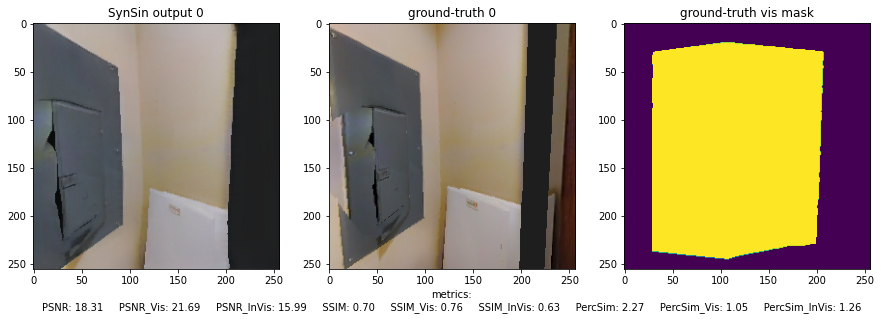

In [4]:
idx = 0

synsin_im = skimage.img_as_float32(skimage.io.imread(os.path.join(synsin_dir, f"{idx:08d}.png")))
d = np.load(os.path.join(data_dir, f"sample_{idx:08d}.npz"))
data = dict(d)
gt_im = data["rgbs"][1]
vis_mask = data["vis_mask"]
d.close()

device='cuda:0'
metrics_dict = metrics(
    torch.tensor(synsin_im, dtype=torch.float32, device=device).unsqueeze(0),
    torch.tensor(gt_im, dtype=torch.float32, device=device).unsqueeze(0),
    torch.tensor(vis_mask, dtype=torch.float32, device=device).unsqueeze(0)
)
metrics_dict = {k: v.item() for k, v in metrics_dict.items()}

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(synsin_im)
plt.title(f'SynSin output {idx}')
plt.subplot(1, 3, 2)
plt.imshow(gt_im)
plt.title(f'ground-truth {idx}')
plt.xlabel('metrics:\n'+'     '.join(f'{k}: {v:.2f}' for k, v in metrics_dict.items()))
plt.subplot(1, 3, 3)
plt.imshow(vis_mask[..., 0])
plt.title('ground-truth vis mask')